# Les equation différentielles avec Python


# Introduction
Tentative de simplification <b>extrême</b> de la résolution d'équations différentielles avec Python, avec un <b>cas pratique systématique</b>, un exemple de <b>la vie réelle</b>. On débute avec ce qui est le plus simple possible.

*  Création en cours *

# Les phrases les plus simples du monde pour comprendre les eq diffs.

- Plus la vitesse d'une auto est grande, plus le frottement de l'air est fort
- Plus la population est grande, plus la vitesse d'accroissement de la population est grande

# Comprendre ce qu'est l'équation différentielle la plus simple: 

"Dans un référentiel de temps,
La vitesse de variation d'une quantité est proportionnelle à cette quantité même ."

Admettons qu'une population croies de 100% par unité de temps
Par exemple, si au temps 1, la population est de 1,
au temps 2 elle sera de 100, et au temps 3 de 10 000. ( Acroissement constant)
La vitesse de variation de la population est donc proportionnelle à la quantité de population.

Résoudre l'equation différentielle, c'est tracer cette fonction permet de savoir quelle sera la population au temps 3.

# Notation
En maths : 
y' = a * y

- y' veut dire dérivée de la fonction y ( C'est la pente de cette fonction en un point précis)
- y est une fonction inconnue
- a est une constante réelle

En physique, on l'écrit différemment:

dy/dt = C

- dy 
- dt
- C est une constante réelle.

# Les méthodes de résolution en Python

- Euler explicite ( Il faut la coder) : https://www.youtube.com/watch?v=LkMuRtk1Qg4
- Scipy : https://www.youtube.com/watch?v=UY8LvjQGKGE

# Problème de Cauchy

C'est quand on donne des conditions initiales à l'équation différentielle.



# Exemple 1.

## Equation y' = a * y

## Notre cas pratique.
Admettons qu'une population croies de 100% par unité de temps.

Par exemple, si au temps 1, la population est de 1
au temps 2 elle sera de 100, et au temps 3 de 10 000. ( Acroissement constant)
La vitesse de variation de la population est donc proportionnelle à la quantité de population.

y' = a * y

## SOlutions Avec Scipy solve_ivp

Il existe 2 types de solutions , la solution numérique, et la solution graphique.

https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations/Examples



In [33]:
from scipy.integrate import solve_ivp
import numpy as np

# Définition de l'équation différentielle
def equation(t, y):
    return a


t0 = 0  # seconde
tf = 1  # seconde
y0 = 0  # Condition initiale

# Résolution
solution = solve_ivp(equation, [t0, tf], [y0], max_step=0.1)

print(solution.t)  # Affichage de la table des instants
print(solution.y[0])  # Affichage des résultats

NameError: name 'a' is not defined

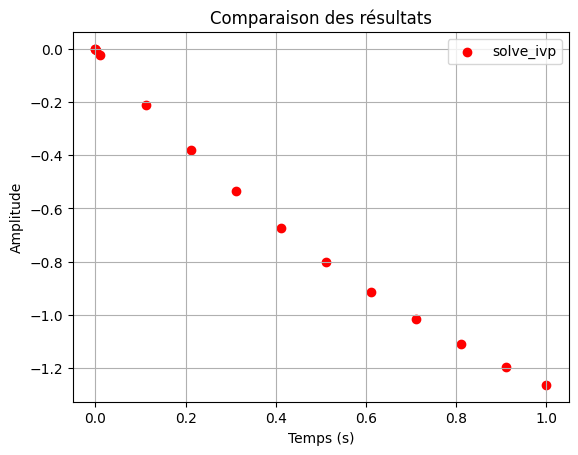

In [ ]:
import matplotlib.pyplot as plt

# Tracé des deux résultats
plt.scatter(solution.t, solution.y[0], label="solve_ivp", color="red")
plt.ylabel('Amplitude')
plt.xlabel("Temps (s)")
plt.title("Comparaison des résultats")
plt.grid(which="both")
plt.legend()
plt.show()